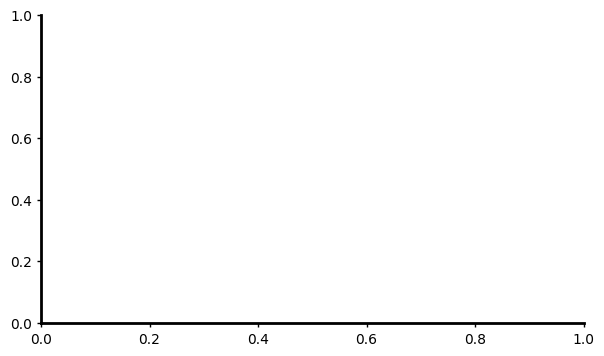

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import random
import os

import matplotlib.pyplot as plt
import numpy as np

# set global settings
def init_plotting():
    plt.rcParams['figure.figsize'] = (7., 4.)
    plt.rcParams['font.size'] = 12
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    # plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    # plt.rcParams['legend.frameon'] = False
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 2.

    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')

init_plotting()

#plt.savefig(name+'.pdf', bbox_inchec='tight')

In [ ]:
def sampleheights(hembeddings, num_samples=2):
    heights = list(hembeddings.keys())
    print(heights)
    all_classes = list(np.arange(0, len(heights)))
    try:
        assert(num_samples<=len(heights))
    except:
        print("number of samples ({num_samples}) > len(heights) = {(len(heights))}!")
    random.seed(42)
    samples = random.sample(all_classes, num_samples)
    print(f"Chosen classes = {samples}")
    for s in samples:
        print(f"Number of each height ({heights[s]}) sample embeddings = {len(hembeddings[heights[s]])}")
    classes = None
    embeddings = None
    for s in samples:
        s_embeddings = hembeddings[heights[s]]
        if(classes is None):
            embeddings = s_embeddings
            classes = np.ones(len(s_embeddings))*s
        else:
            embeddings = np.vstack([embeddings, s_embeddings])
            classes = np.hstack([classes, np.ones(len(s_embeddings))*s])
    return embeddings, classes

def sampleGenderheights(hembeddings, num_samples=2):
    embds = {}
    clss = {}
    for g in ['Man', 'Woman']:
        ghembeddings = hembeddings[g]
        gembeddings, gclasses = sampleheights(ghembeddings, num_samples)
        embds[g] = ghembeddings
        clss[g] = gclasses
    return embds, clss
    

def tsnePlot(embeddings, classes, heights, type_="Height"):
    tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=300)
    e = embeddings.reshape(-1, embeddings.shape[2])
    tsne_results = tsne.fit_transform(e)

    # plt.style.use('default')
    # plt.style.use('seaborn-dark')  # You can use 'ggplot', 'seaborn-darkgrid', etc.
    # plt.figure(figsize=(8, 6))  # Set the figure background to black

    
    unique_classes = np.unique(classes)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))

    for i, uclass in enumerate(unique_classes):
        indices = np.where(classes == uclass)
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], 
                    color=colors[i], label=f'{type_} = {heights[int(uclass)]}', alpha=0.75)

    plt.title(f"t-SNE Visualization of {type_} clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.show()
    
def tsneGPlot(embeddings, classes, heights, type_="Height"):
    tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate=300)
    plt.style.use('seaborn-dark')  # You can use 'ggplot', 'seaborn-darkgrid', etc.
    plt.figure(figsize=(8, 6))  # Set the figure background to black

    for g in ['Man', 'Woman']:
        print(embeddings[g])
        e = embeddings[g].reshape(-1, embeddings[g].shape[2])
        tsne_results = tsne.fit_transform(e)

        # plt.style.use('default')
        

        unique_classes = np.unique(classes)
        colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))

        for i, uclass in enumerate(unique_classes):
            indices = np.where(classes == uclass)
            plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], 
                        color=colors[i], label=f'Height = {heights[int(uclass)]}', alpha=0.75)

    plt.title(f"t-SNE Visualization of {type_} clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.show()


# for f in os.listdir('./'):
#     if f.endswith('.pkl') and 'Height' in f:
#         t = f.split('_')[0]
#         print(t)
#     else:
#         continue
#     print(f"Processing \"{t}\"...")
#     with open(f, 'rb') as ef:
#         embeddings = pkl.load(ef)
    
#     try:
#         types = list(embeddings.keys())
#         embds, classes = sampleheights(embeddings, num_samples=4)
#         print(len(embds), len(classes))

#         tsnePlot(embds, classes, types, t)
#     except:
#         continue

In [7]:
f = 'Smoking_embeddings.pkl'
with open(f, 'rb') as ef:
        hembeddings = pkl.load(ef)

In [13]:
# embds, clss = sampleGenderheights(hembeddings, num_samples=2)
embds, clss = sampleheights(hembeddings, num_samples=4)

['Rarely', 'Never', 'Socially', 'Often']
Chosen classes = [0, 3, 1, 2]
Number of each height (Rarely) sample embeddings = 24
Number of each height (Often) sample embeddings = 31
Number of each height (Never) sample embeddings = 19
Number of each height (Socially) sample embeddings = 26


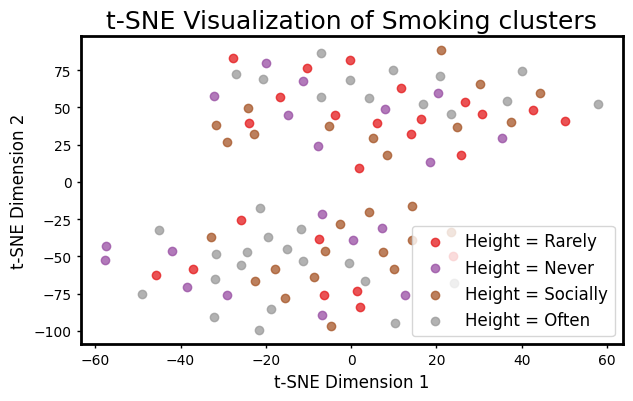

In [18]:
tsnePlot(embds, clss, list(hembeddings.keys()), "Smoking")